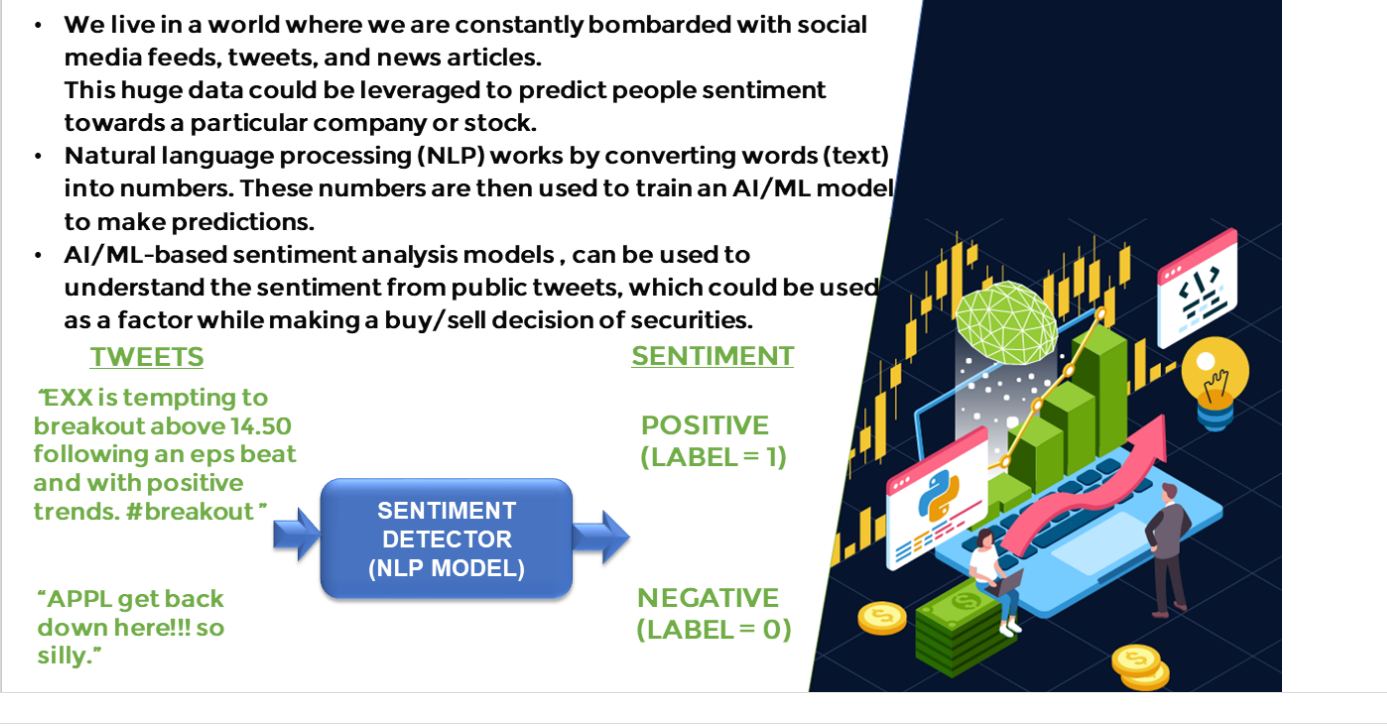

In [1]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
#import plotly.express as px

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

In [2]:
#!pip install plotly

In [3]:
stock_df = pd.read_csv('stock_sentiment.csv')

In [4]:
stock_df.head(4)

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1


# dataframe information

In [5]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


# check for null values 

In [6]:
stock_df.isnull().sum()

Text         0
Sentiment    0
dtype: int64

# How many unique elements are present in the 'sentiment' column? Try to find out with two different methods 

In [7]:
stock_df['Sentiment'].nunique()

2

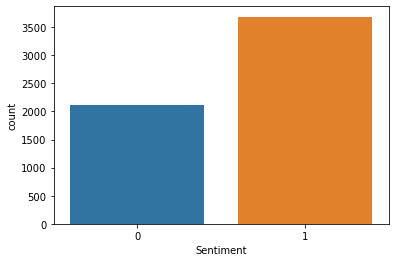

In [8]:
sns.countplot(stock_df['Sentiment'])

# #TASK #3: PERFORM DATA CLEANING (REMOVE PUNCTUATIONS FROM TEXT)


In [9]:
import string

In [10]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [11]:
stock_df.columns

Index(['Text', 'Sentiment'], dtype='object')

# write a function to remove the punctuation marks 

In [12]:
def remove_punc_func(message):
    Test_punc_removed=[char for char in message if char  not in string.punctuation]
    Test_punc_removed_join =''.join(Test_punc_removed)
    
    return Test_punc_removed_join

In [13]:
# lets remove the punctuation  from our data set 
stock_df['Text Without Punctuation']=stock_df['Text'].apply(remove_punc_func)

In [14]:
stock_df['Text Without Punctuation'].nunique()

5786

In [15]:
# perform data cleaning  ( rmeove stopwords)
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Asmita
[nltk_data]     Chatterjee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
from nltk.corpus import stopwords 

stop_words=stopwords.words('english')
stop_words.extend(['from','subject','re','edu','use','will','aap','co','day','user','stock','today','week','year','https'])

##### testing 

In [17]:
text =" i love you kolkata . "

In [18]:
for check in gensim.utils.simple_preprocess(text):
    print(check)

love
you
kolkata


# testing

# remove stopwords or  remove short words less than 2  characaters 

In [19]:
def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if len(token)>=3  and token not in stop_words and token !="None":
            result.append(token)
    return result         

In [20]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords']=stock_df['Text Without Punctuation'].apply(preprocess)

In [21]:
stock_df.head(4)

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]


# task 5 : plot wordcloud

## first convert the list of columns to string

In [22]:
stock_df['Text Without Punc & Stopwords Joined']=stock_df['Text Without Punc & Stopwords'].apply(lambda x : " ".join(x))

In [23]:
stock_df.head(4)

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta


In [24]:
# plot the positive sentiment , 

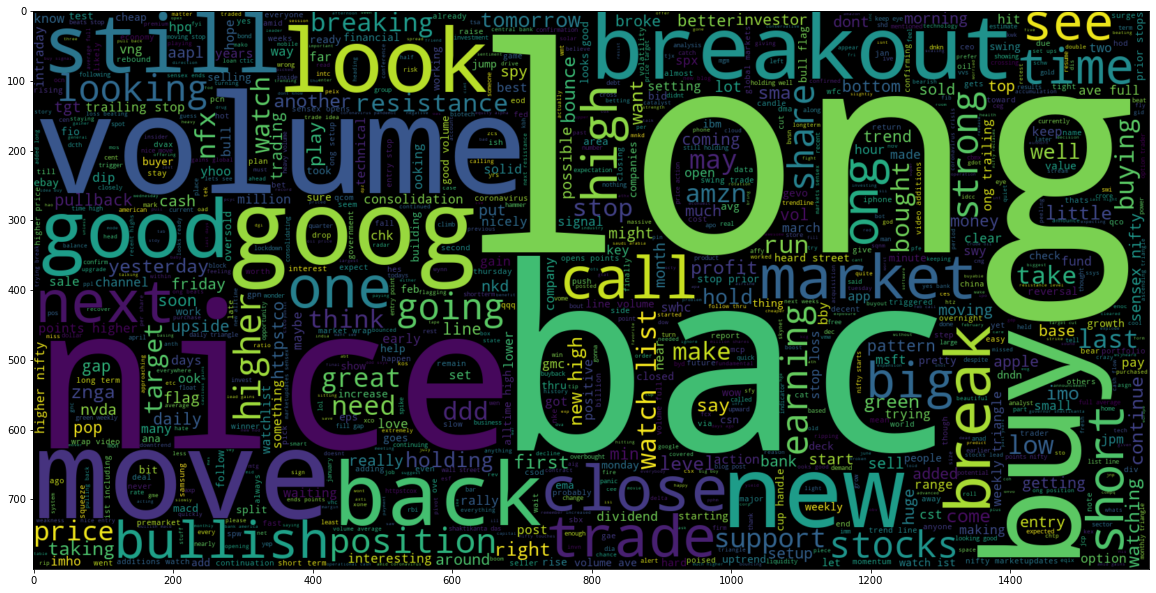

In [25]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

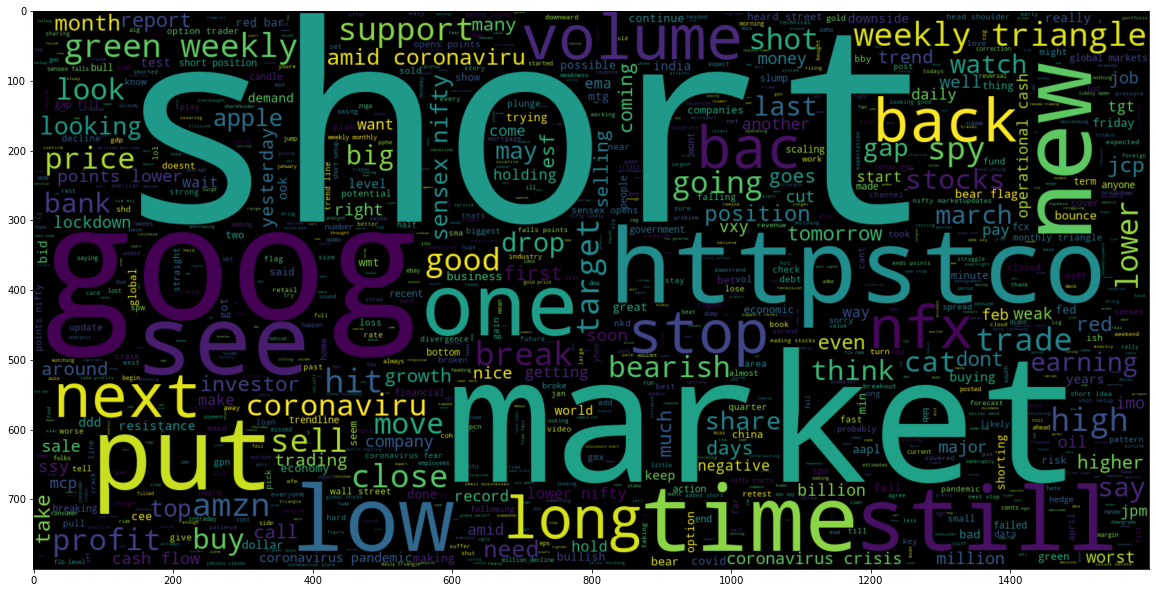

In [26]:
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Asmita
[nltk_data]     Chatterjee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
# obtain  the maximum length  of data in the document 
# this will be later used when word embeddings will be generated 
maxlen=-1
for doc in  stock_df['Text Without Punc & Stopwords Joined']:
    tokens=nltk.word_tokenize(doc)
    if  maxlen < len(tokens):
        maxlen=len(tokens)
        
print("the maximum  number of words  in any document ",maxlen)        

the maximum  number of words  in any document  20


In [29]:
#tweets_length=[len(nltk.word_tokenize(x)) for x in  stock_df['Text Without Punc & Stopwords Joined']]

In [30]:
#tweets_length

# PREPARE THE DATA BY TOKENIZING AND PADDING

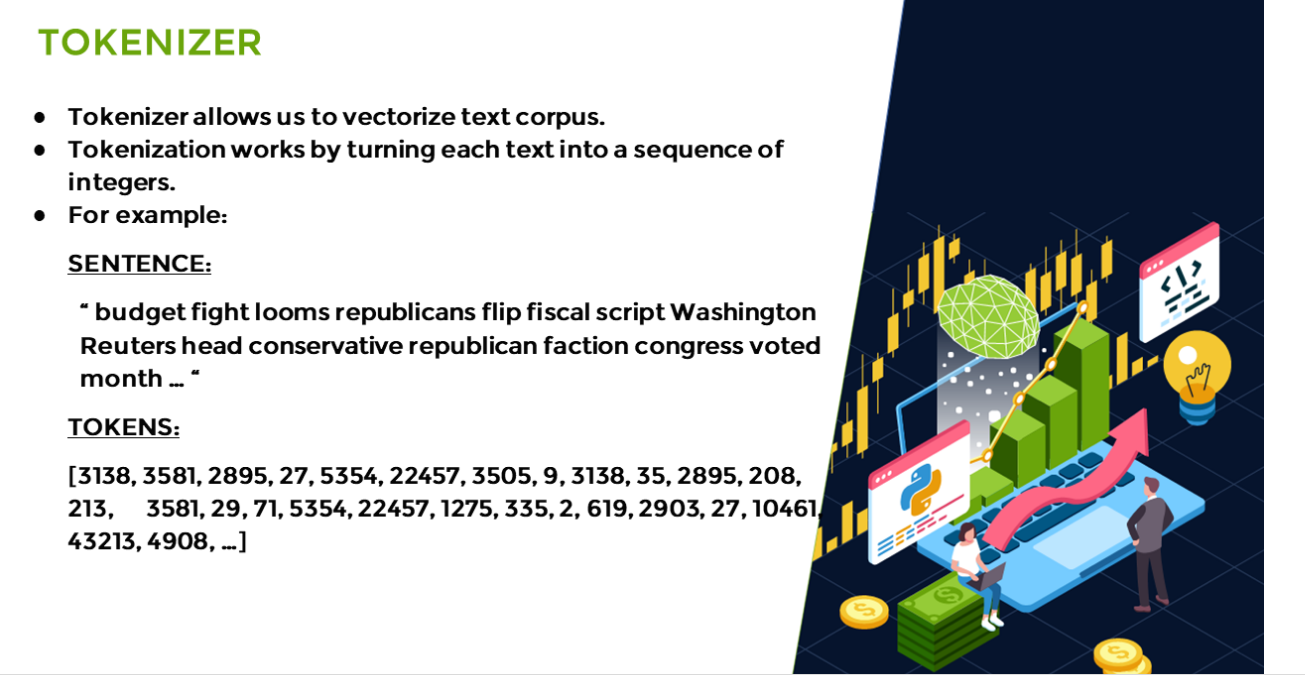

# Obtain the total words present in the dataset

In [31]:
# Obtain the total words present in the dataset
list_of_words = []
for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [32]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

In [33]:
total_words

9268

# find out the vocab size 

In [34]:
#vocab_size = total_words + 1

In [35]:
#vocab_size

In [36]:
maxlen

20

In [37]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

In [38]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [39]:
X_train.shape

(4053,)

In [40]:
X_test.shape

(1738,)

In [41]:
X_train

3379        [amzn, goog, move, higher, nqf, turns, green]
4457    [dtk, cay, pfe, bac, bib, stem, jazz, oncy, ke...
5390    [global, stocks, fall, president, trump, issue...
3346                                [dcth, strong, start]
194                          [looks, good, heading, next]
                              ...                        
2816    [foot, ocker, increases, quarterly, dividend, ...
115     [spy, ncle, ben, needed, spice, things, little...
2530    [premarket, advanced, qik, gtat, iep, meko, wt...
1194    [breaks, low, saying, even, feel, sold, money,...
1857    [getting, long, building, position, move, thru...
Name: Text Without Punc & Stopwords, Length: 4053, dtype: object

# Create a tokenizer to tokenize the words and create sequences of tokenized words

In [42]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [43]:
train_sequences

[[55, 8, 16, 17, 2065, 1568, 51],
 [3056,
  2066,
  898,
  7,
  3057,
  1569,
  1570,
  3058,
  767,
  3059,
  768,
  97,
  75,
  406,
  23,
  164,
  1265,
  264],
 [98, 29, 252, 1266, 769, 1267, 6, 2067, 1268, 19, 1269, 3060, 3061],
 [770, 66, 114],
 [49, 5, 513, 13],
 [76, 77, 32, 99, 12],
 [32, 2068, 115, 61, 5, 99, 199, 319, 3062, 469],
 [65, 265, 9, 200, 1046, 82, 1571, 21],
 [8, 1047, 432],
 [1572, 1573, 3063, 3064, 1270, 3065, 3066, 3067, 57, 470, 3068],
 [2069, 107, 433, 29, 3069, 3070, 615, 1574, 2070, 514],
 [350, 68, 1048, 149, 616, 8, 116, 3071, 13, 201],
 [515, 26, 10, 1575, 10, 688, 617],
 [6, 34, 2071, 1576, 3072, 15, 899, 266],
 [37, 89, 15, 3073, 516, 434, 1577, 689],
 [3074, 2072, 3075, 1271, 3076, 3077, 3078],
 [547, 89, 1049, 3079, 1050, 1, 3080, 183, 150],
 [1051, 1052, 1272, 19, 407, 771, 3081],
 [900, 16, 32, 10, 2],
 [3082, 61, 3, 18, 151, 202, 471, 1053, 61, 18, 901, 202],
 [2073, 320, 73, 3083, 1273, 15, 2073, 1274, 141, 2074, 80, 176],
 [1275, 2075, 194, 408,

In [44]:
test_sequences

[[61, 15, 15, 171, 1398, 4477, 3, 814, 1625],
 [372, 354, 12, 4088, 61, 3, 18, 24, 48, 376, 143, 1093],
 [207, 89, 208, 546, 131, 149, 14, 111, 34],
 [109, 36, 10, 7308, 7398, 246],
 [574, 1966, 4, 164, 339, 56, 26, 43],
 [808, 944, 3279, 1529, 3948, 2221, 4294, 1316, 6864, 1618, 6939],
 [1, 1, 575, 717, 72, 64, 12],
 [616, 37, 26, 17, 3113, 329, 1578, 37, 6383, 74, 626, 3846],
 [712, 8, 516, 21, 616, 1, 56, 130],
 [308, 5392, 106, 2453, 45, 821, 211, 232, 17],
 [313, 4744, 528, 188, 191, 13, 182, 34, 2638, 4057, 164],
 [379, 382, 89, 2, 184, 5, 17, 13, 58],
 [333, 51, 429, 76, 192],
 [41, 1045, 63, 286, 162],
 [902, 15, 3595, 902, 3903, 2782, 278, 4810, 454, 1412, 37],
 [10, 71, 64, 2, 81, 198],
 [496, 370, 1815, 1594, 176, 155, 555],
 [816, 1210, 10, 2428, 114, 79, 292, 784, 201],
 [176, 28, 340, 676, 2399, 1121, 392, 10],
 [1560, 5914, 296, 19, 209, 625],
 [9, 31, 965, 485, 372, 1705, 12, 813, 2258, 142, 960],
 [315, 1, 567],
 [32, 2545],
 [2077, 889, 3482, 121, 30, 839, 54, 459, 6,

# test the encoding of a specific  line

In [45]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 4457    [dtk, cay, pfe, bac, bib, stem, jazz, oncy, ke...
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [3056, 2066, 898, 7, 3057, 1569, 1570, 3058, 767, 3059, 768, 97, 75, 406, 23, 164, 1265, 264]


In [46]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = maxlen, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = maxlen, truncating = 'post')

In [47]:
y_train

3379    1
4457    1
5390    0
3346    1
194     1
       ..
2816    1
115     0
2530    1
1194    0
1857    1
Name: Sentiment, Length: 4053, dtype: int64

In [48]:
y_test

1355    1
1480    1
51      1
2063    1
1401    1
       ..
399     0
5382    1
4472    0
3883    1
469     1
Name: Sentiment, Length: 1738, dtype: int64

In [49]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [60]:
# the actual reprsentation of y_train and y_test is as follows
## since this example ,  has 2 classes , hence , num_classes =1 
# y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
# y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [51]:
y_train_cat.shape , y_test_cat.shape

((4053, 2), (1738, 2))

In [52]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

# details of teh  embedding layer 
## 1st parameter " input_dim"Integer. Size of the vocabulary, i.e. maximum integer index + 1.
# output_dim	Integer. Dimension of the dense embedding.

In [53]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non

In [57]:
padded_train

array([[  55,    8,   16, ...,    0,    0,    0],
       [3056, 2066,  898, ...,  264,    0,    0],
       [  98,   29,  252, ...,    0,    0,    0],
       ...,
       [ 334,  944, 2006, ...,    0,    0,    0],
       [ 212,   63,  662, ...,    0,    0,    0],
       [  90,    4,  459, ...,    0,    0,    0]])

In [58]:
y_train

3379    1
4457    1
5390    0
3346    1
194     1
       ..
2816    1
115     0
2530    1
1194    0
1857    1
Name: Sentiment, Length: 4053, dtype: int64

In [59]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [54]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 3242 samples, validate on 811 samples
Epoch 1/2
3242/3242 [==============================] - 25s 8ms/sample - loss: 0.6408 - acc: 0.6518 - val_loss: 0.5345 - val_acc: 0.7398
Epoch 2/2
3242/3242 [==============================] - 24s 8ms/sample - loss: 0.3822 - acc: 0.8365 - val_loss: 0.5027 - val_acc: 0.7509


# make prediction

In [55]:
# make prediction
pred = model.predict(padded_test)

In [56]:
pred

array([[0.19384637, 0.8061536 ],
       [0.20027374, 0.79972625],
       [0.30236354, 0.6976364 ],
       ...,
       [0.36907125, 0.63092875],
       [0.25705317, 0.7429468 ],
       [0.2600064 , 0.73999363]], dtype=float32)

# pick out every prediction in a  list 

# np.aregmax returns indices of the max element of the array in a particular axis.

In [70]:
prediction =[]

for i in pred:
    prediction.append(np.argmax(i))

In [71]:
prediction

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


# for the test data set , check out the list  containing original values 

In [74]:
original=[]
for i  in y_test_cat:
    original.append(np.argmax(i))

In [75]:
original

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,


# accuracy score on  test data 

In [76]:
from sklearn.metrics import accuracy_score 

accuracy = accuracy_score(original , prediction)

In [77]:
accuracy

0.6553509781357882

In [78]:
# plot the confusion matrix 
( X_test , y_test , pred)

(1355    [would, buy, buy, growth, sells, ipads, iphone...
 1480    [risk, tight, stop, however, would, like, see,...
 51      [aapl, daily, broke, downtrendfrom, closing, p...
 2063    [setps, small, big, variety, watch, tzym, jag,...
 1401    [qgc, seems, finding, long, term, range, posit...
                               ...                        
 399     [jemberlin, number, good, swing, personally, h...
 5382    [markets, entered, calmer, stretch, investors,...
 4472    [cat, caterpillar, machine, etail, sales, drop...
 3883                            [geo, need, good, volume]
 469                                                    []
 Name: Text Without Punc & Stopwords, Length: 1738, dtype: object,
 1355    1
 1480    1
 51      1
 2063    1
 1401    1
        ..
 399     0
 5382    1
 4472    0
 3883    1
 469     1
 Name: Sentiment, Length: 1738, dtype: int64,
 array([[0.19384637, 0.8061536 ],
        [0.20027374, 0.79972625],
        [0.30236354, 0.6976364 ],
        ...,
  

# plot the confusion matrix 

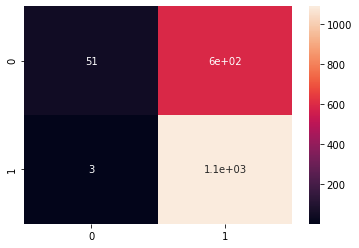

In [79]:
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(original , prediction)
sns.heatmap(cm, annot=True)

In [82]:
pred

array([[0.19384637, 0.8061536 ],
       [0.20027374, 0.79972625],
       [0.30236354, 0.6976364 ],
       ...,
       [0.36907125, 0.63092875],
       [0.25705317, 0.7429468 ],
       [0.2600064 , 0.73999363]], dtype=float32)